# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Driving Behavior Prediction

In this project, we will implement the machine learning algorithm to get a model able to detect the driver's mental state, whether: Focused, De-Focused or Drowsy, from his EEG brain signals readings, using a headset during driving.

## Getting Started

In the next code cells, we will define some functions along with a few of the necessary Python libraries required for visualization and exploration of data, model training and testing, etc in this project.

In [1]:
# Import statements
import pandas as pd
import numpy as np

In [2]:
# Import 'matplotlib.pyplot'
import matplotlib.pyplot as plt

def distribution(data, value, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    # Create figure
    fig = plt.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate([value]):
        ax = fig.add_subplot(1, 1, i+1)
        ax.hist(data[data.columns[feature-1]], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(data.columns[feature-1]), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 500))
        ax.set_yticks([0, 100, 200, 300, 400, 500])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous EEG Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous EEG Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()

In [3]:
# Import 'accuracy_score'
from sklearn.metrics import accuracy_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

In [4]:
# Import 'make_scorer', 'SVC', 'GridSearchCV', and 'ShuffleSplit'
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a linear discriminant analysis object
    clf = SVC(kernel='rbf', class_weight='balanced')
    
    # Create a dictionary for the parameters
    params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'clf', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(clf, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Exploring the Data

In the next section, we will load the data and split it into features and target label. The data consists of 70 features and one target label the `state`. The feature vector for each data entry is about the five frequency bands values for each channel from the 14, concatenated in one vector performing the features. The state classes are represented in a numerical form, where: ***1*** is `Focused`, ***2*** is `De-Focused` and **3** is `Drowsy`.

The dataset contains **510** data entries collected from different **34** EEG records of ***5*** participants (i.e. about 7 records for each participant on average). Each succesive **15** entry belong to one record, where each state class has **5** samples.

The next code cell will display the first fifteen entries, which belong to the first record file.

In [5]:
# Allows the use of display() for DataFrames
from IPython.display import display

# Read the data.
raw_data = pd.read_csv('data_set_file.csv')

# Split the data into features and target label
target_raw = raw_data[raw_data.columns[-1]]
features_raw = raw_data.drop(raw_data.columns[-1], axis = 1)

# Print data shape. 
print("The shape of the data: {}".format(raw_data.shape))

# Success - Display the first fifteen records
display(raw_data.head(n=15))

The shape of the data: (510, 71)


,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14),state
0,0.572947,0.284247,0.246387,1.166971,1.149049,3541.440612,35.999725,10.278806,14.119139,5.238184,...,0.145080,0.095880,0.278998,0.275061,882.886332,17.519078,9.432376,15.147043,5.821593,1
1,0.429233,0.238602,0.252168,1.068175,1.159840,5411.470711,151.745579,10.770131,13.461449,5.515470,...,0.397978,0.093562,0.340707,0.312910,5503.528066,151.488443,10.554340,16.218259,6.645359,1
2,0.407206,0.250608,0.270695,1.122825,1.164457,1923.459311,27.757026,10.330033,12.687345,4.412471,...,0.085161,0.063391,0.177088,0.175507,633.097970,15.431311,9.502504,14.413115,5.477437,1
3,0.546453,0.241685,0.280362,1.137865,1.196406,4439.717244,77.442545,20.539788,19.605165,6.340742,...,0.147205,0.029482,0.145566,0.106374,4216.206768,46.123923,16.484015,17.312265,6.970426,1
4,0.444954,0.200428,0.254949,1.129726,1.194006,71234.345035,1240.070550,107.633892,38.436833,11.973087,...,6.557038,0.893655,0.378499,0.183685,78375.162620,1378.809431,123.644262,46.541710,14.101548,1
5,0.266139,0.376277,0.210674,1.079059,1.133378,40471.241143,61.036090,14.452036,19.373414,11.324540,...,0.250090,0.097292,0.189574,0.172025,46509.144455,55.233378,17.100730,22.305623,14.107264,2
6,0.195754,0.405330,0.222020,1.061335,1.075114,7013.645250,43.707282,10.790249,13.163875,6.317268,...,0.056764,0.035444,0.088376,0.094955,7843.667194,37.345718,11.016696,15.494401,8.279327,2
7,0.182157,0.399722,0.201890,1.149534,1.126363,6818.960449,126.329278,11.581273,18.729675,8.411914,...,0.356097,0.065461,0.154537,0.142348,7923.573110,139.076096,13.825262,21.639319,9.573691,2
8,0.166117,0.353679,0.215460,1.063283,1.153364,180.735988,24.804185,8.389364,11.530813,4.463484,...,0.057419,0.036699,0.105575,0.104321,78.655356,15.209409,9.685466,13.430976,4.847770,2
9,0.147261,0.411029,0.217897,1.073732,1.068933,45415.722572,156.073047,25.856097,24.804436,18.217311,...,1.079089,0.079519,0.187029,0.150347,54328.859063,186.305470,25.147339,30.134324,22.034817,2


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With our dataset for example, feature such as: `'delta ch(2)'`, fit this description. 

The code cell below will plot a histogram of this feature. Note the range of the values present and how they are distributed.

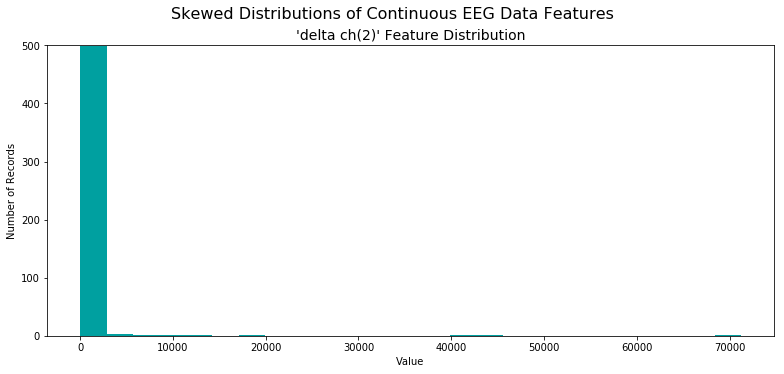

In [6]:
# Visualize skewed continuous features of original data
distribution(raw_data, 6)

For highly-skewed feature distributions such as `'delta ch(2)'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

The code cell below will perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed.

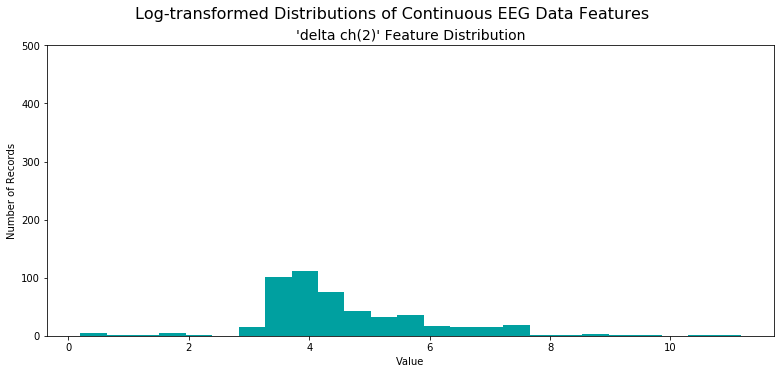

In [7]:
# Log-transform the skewed features
features_log_transformed = features_raw.apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution(features_log_transformed, 6, transformed = True)

### Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](https://www.stat.cmu.edu/~cshalizi/statcomp/13/labs/05/lab-05.pdf): An **outlier step** is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [8]:
# Calculate Q1 (25th quantile of the data) for all features.
Q1 = features_log_transformed.quantile(0.25)

# Calculate Q3 (90th quantile of the data) for all features.
Q3 = features_log_transformed.quantile(0.90)

# Use the interquartile range to calculate an outlier step (1.5 times the interquartile range).
IQR = Q3 - Q1
step = 1.5 * IQR

# Remove the outliers from the dataset.
features_log_transformed_out = features_log_transformed[~((features_log_transformed < (Q1 - step)) |(features_log_transformed > (Q3 + step))).any(axis=1)]

# Join the features and the target after removing outliers.
preprocessed_data_out = features_log_transformed_out.join(target_raw)
target_raw_out = preprocessed_data_out[preprocessed_data_out.columns[-1]]

# Print data shape after removing outliers.
print("The shape of the data after removing outliers: {}".format(preprocessed_data_out.shape))

# Success - Display the first ten records
display(preprocessed_data_out.head(n=10))

The shape of the data after removing outliers: (396, 71)


,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14),state
0,0.452951,0.250172,0.220249,0.773330,0.765025,8.172571,3.610910,2.422925,2.715961,1.830689,...,0.135474,0.091557,0.246077,0.242994,6.784328,2.918801,2.344914,2.781737,1.920093,1
1,0.357138,0.213983,0.224877,0.726666,0.770034,8.596461,5.028774,2.465565,2.671486,1.874179,...,0.335027,0.089441,0.293197,0.272246,8.613326,5.027089,2.447061,2.845970,2.034099,1
2,0.341606,0.223630,0.239564,0.752748,0.772169,7.562400,3.358882,2.427457,2.616472,1.688706,...,0.081728,0.061463,0.163044,0.161699,6.452203,2.799189,2.351614,2.735219,1.868325,1
3,0.435964,0.216470,0.247142,0.759808,0.786822,8.398571,4.362366,3.069902,3.025542,1.993440,...,0.137328,0.029055,0.135899,0.101088,8.346928,3.852781,2.861287,2.907571,2.075738,1
8,0.153679,0.302826,0.195122,0.724298,0.767031,5.202555,3.250537,2.239578,2.528191,1.698087,...,0.055831,0.036041,0.100365,0.099231,4.377709,2.785592,2.368885,2.669377,1.766060,2
11,0.243399,0.416432,0.246914,0.716920,0.609165,4.611930,3.181279,2.119651,2.403115,1.596151,...,0.096360,0.062337,0.223881,0.184293,4.308840,2.709964,2.282973,2.621324,1.751905,3
14,0.231168,0.416768,0.234074,0.757738,0.604992,4.560934,3.450720,2.204463,2.457886,1.612568,...,0.094610,0.064218,0.209050,0.183974,4.274626,2.750143,2.150309,2.540910,1.696993,3
15,0.319035,0.132891,0.110695,0.269885,0.161230,7.217653,3.265109,2.175213,2.556429,1.651229,...,0.033715,0.021577,0.048882,0.049247,7.651503,2.883918,2.233456,2.616125,1.719394,1
16,0.359671,0.212949,0.133650,0.290370,0.162559,7.326955,2.975198,2.381263,2.645452,1.642183,...,0.032390,0.015388,0.052999,0.036384,7.384579,2.846160,2.271259,2.627694,1.595041,1
17,0.314252,0.189369,0.157402,0.383091,0.254917,7.488508,3.129113,2.125692,2.609765,1.700369,...,0.030990,0.018014,0.057290,0.053625,7.450604,2.786484,2.284117,2.668754,1.770094,1


### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'delta ch(2)'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [9]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform_out = pd.DataFrame(scaler.fit_transform(features_log_transformed_out), columns=features_raw.columns)

# Show an example of a record with scaling applied
display(features_log_minmax_transform_out.head())

,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,delta ch(13),theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14)
0,0.122683,0.100524,0.134160,0.433059,0.520178,0.925529,0.530846,0.214469,0.429813,0.625276,...,0.297717,0.236651,0.190770,0.213827,0.235725,0.677290,0.363328,0.238914,0.441711,0.626872
1,0.088784,0.074159,0.138888,0.402480,0.523890,1.000000,0.950541,0.224466,0.415325,0.650494,...,1.000000,0.586360,0.186340,0.254861,0.264148,1.000000,1.000000,0.268183,0.466433,0.692629
2,0.083289,0.081187,0.153891,0.419571,0.525472,0.818331,0.456244,0.215531,0.397403,0.542946,...,0.219069,0.142463,0.127787,0.141519,0.156735,0.618690,0.327207,0.240834,0.423807,0.597013
3,0.116673,0.075970,0.161633,0.424198,0.536330,0.965234,0.753281,0.366153,0.530663,0.719648,...,0.730742,0.239900,0.059965,0.117880,0.097841,0.952996,0.645376,0.386874,0.490141,0.716646
4,0.016800,0.138885,0.108491,0.400929,0.521665,0.403742,0.424173,0.171483,0.368644,0.548386,...,0.150208,0.097079,0.074585,0.086937,0.096037,0.252664,0.323101,0.245783,0.398466,0.538028


----

## Developing a Model
In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in the model's predictions.

### Shuffle and Split Data
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [10]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Assign the features to the variable Bands, and the labels to the variable state.
Bands = np.array(features_log_minmax_transform_out)
state = np.array(target_raw_out)

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Bands, state, test_size=0.2, random_state=42, shuffle=True)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### PCA Transformation

We can now apply PCA to the data for dimensionality reduction, to fit the relatively small size of the data compared to its features number, and also to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the next code cell, we will plot the Cumulative Summation of the Explained Variance, to help us decide the number of principal components to be used in the transformation.

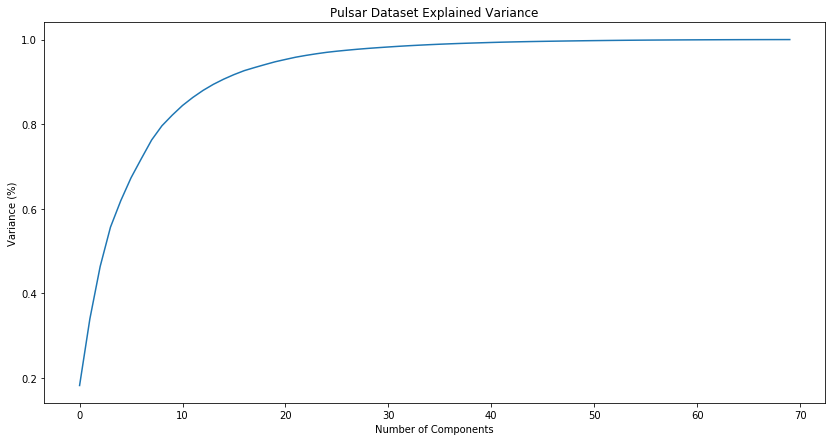

In [11]:
# Import PCA
from sklearn.decomposition import PCA

# Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize = (14,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

This plot tells us that selecting **33** components we can preserve something around 97% or 98% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

With this information in our hands, we can implement the PCA for **33** best components by using the next snippet of code.

In [12]:
# Import time
from time import time

# From the Explained Variance graph.
n_components = 33

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

# Create an instance of PCA, initializing with n_components=n_components and whiten=True
pca = PCA(n_components=n_components)

# Pass the training dataset (X_train) to pca's 'fit()' method
pca = pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Explained variance ratios:", pca.explained_variance_ratio_*100)
print("done in %0.3fs" % (time() - t0))


Extracting the top 33 eigenfaces from 316 faces
Explained variance ratios: [18.13438172 15.77876048 12.39420029  9.29099567  6.26499169  5.43190718
  4.52436489  4.41634351  3.35939466  2.51632471  2.28796606  1.90266741
  1.67373601  1.4348223   1.22220207  1.07383505  0.9413552   0.73090361
  0.69635085  0.66945919  0.55251081  0.53324383  0.42770505  0.38145065
  0.34121742  0.27152868  0.23843399  0.22141189  0.19682605  0.17638858
  0.16394574  0.15687332  0.14191673]
done in 0.018s


### Fitting The Model
Our final implementation requires that we bring everything together and train a model using the **support vector machine algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'gamma'` and `'C'` parameters for the **svm classifier**.

In addition, the implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.

In [13]:
# Fit the training data to the model using grid search
model = fit_model(X_train_pca, y_train)

# Produce the value for 'gamma' and 'C'
print("Parameter 'gamma' is {} for the optimal model.".format(model.get_params()['gamma']))
print("Parameter 'C' is {} for the optimal model.".format(model.get_params()['C']))

Parameter 'gamma' is 0.1 for the optimal model.
Parameter 'C' is 1000.0 for the optimal model.


### Making Predictions
Once the model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a **support vector machine**, the model has learned **how the frequency bands values relate to the mental state of the driver**, and can respond with a detection of the current **mental state**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on (i.e testing data or future readings of the driver's brain signals).

In [14]:
# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X_test_pca)

# Label states class.
states_class = ['Focused', 'De-Focused', 'Drowsy']

# Show predictions
for i, state in enumerate(y_pred):
    print("Predicted mental state for test {}'s bands: {}".format(i+1, states_class[state-1]))

Predicted mental state for test 1's bands: Drowsy
Predicted mental state for test 2's bands: De-Focused
Predicted mental state for test 3's bands: De-Focused
Predicted mental state for test 4's bands: Focused
Predicted mental state for test 5's bands: Drowsy
Predicted mental state for test 6's bands: Focused
Predicted mental state for test 7's bands: De-Focused
Predicted mental state for test 8's bands: De-Focused
Predicted mental state for test 9's bands: De-Focused
Predicted mental state for test 10's bands: Drowsy
Predicted mental state for test 11's bands: Focused
Predicted mental state for test 12's bands: Drowsy
Predicted mental state for test 13's bands: Drowsy
Predicted mental state for test 14's bands: De-Focused
Predicted mental state for test 15's bands: Drowsy
Predicted mental state for test 16's bands: Focused
Predicted mental state for test 17's bands: De-Focused
Predicted mental state for test 18's bands: Drowsy
Predicted mental state for test 19's bands: De-Focused
Pred

## Final Model Evaluation
In this final section, we will run some evaluation metrics to check the performance of the optimized model on the testing data.

In the next code cell, we will calculate the `'F1-Score'` of the model on testing data perdictions.

In [15]:
# Import 'f1_score'
from sklearn.metrics import f1_score

# Calculate the f1 score and assign it to the variable score.
score = f1_score(y_test, y_pred, average='micro')

# Print score.
print("F1 score: %0.1f %%" %(score*100))

F1 score: 87.5 %


Run the next cell, to calculate the confusion matrix of the **3** state classes.

In [16]:
# Import 'confusion_matrix'
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix and assign it to the variable matrix.
matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix.
print(matrix)

[[28  1  1]
 [ 3 23  3]
 [ 1  1 19]]


Finally, we make a classification report to get a detailed performance evaluation, with scores for the model on each **mental state** class.

In [17]:
# Import 'classification_report'
from sklearn.metrics import classification_report

# Calculate the classification report and assign it to the variable report.
report = classification_report(y_test, y_pred)

# Print the classification report.
print(report)

              precision    recall  f1-score   support

           1       0.88      0.93      0.90        30
           2       0.92      0.79      0.85        29
           3       0.83      0.90      0.86        21

   micro avg       0.88      0.88      0.88        80
   macro avg       0.87      0.88      0.87        80
weighted avg       0.88      0.88      0.87        80



## Results Comment
The model attained a testing accuracy of around **88%**, which indicates a good performance of the model that we can rely on for **mental state** detection.